import libraries and predifine parameters

In [1]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dropout, Embedding
from keras.layers.core import Dense, Activation
import numpy as np

import matplotlib.pyplot as plt
import pickle
import heapq
import random

current_path = 'drive/My Drive/Colab Notebooks/Next word prediction/for_github/'
number_of_previous_words = 4
words_length_embedded = 100
word2index = {}
index2word = {}

### set parameters
Load parameters from file and set to varables.

This file is saved in preprocess_data file.

In [2]:
def set_parameters(path):
    f = open(current_path + path, 'rb') 
    parameters = pickle.load(f)
    f.close()
    number_of_previous_words = parameters['number_of_previous_words']
    return number_of_previous_words
number_of_previous_words = set_parameters('data/parameters.p')

### load files
Load files that is saved in preprocessing of data.



In [6]:
def load_words_from_file():
    with open(current_path + 'data/data_train.p', 'rb') as f:
        train_data = pickle.load(f)

    with open(current_path + 'data/labels_train.p', 'rb') as f:
        train_labels = pickle.load(f)
        
    with open(current_path + 'data/word2index.p', 'rb') as f:
        word2index = pickle.load(f)

    with open(current_path + 'data/index2word.p', 'rb') as f:
        index2word = pickle.load(f)
    return train_data, train_labels, word2index, index2word

train_data, train_labels, word2index, index2word = load_words_from_file()

### build model
Use an Embedded layer at first.

Then tow lstm layer.

Then tow Dense layer with one Dropout between them.

Use softmax activation and adam aptimizer and sparse_categorical_crossentropy as loss function.


In [13]:
model = Sequential()
model.add(Embedding(len(word2index), words_length_embedded, input_length=number_of_previous_words))
model.add(LSTM(512, input_shape=(number_of_previous_words, words_length_embedded), return_sequences=True))
model.add(LSTM(512, return_sequences=False))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(len(word2index)))
model.add(Activation('softmax'))
optimizer = 'adam'
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 100)            621900    
_________________________________________________________________
lstm_6 (LSTM)                (None, 4, 512)            1255424   
_________________________________________________________________
lstm_7 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 6219)              802251    
_________________________________________________________________
activation_3 (Activation)    (None, 6219)             

In [14]:
history = model.fit(train_data, train_labels, validation_split=0.2, batch_size=512, epochs=65, shuffle=True)
model.save(current_path + 'model/model.h5')

Epoch 1/65
58/58 [==============================] - 4s 33ms/step - loss: 8.1447 - accuracy: 0.0393 - val_loss: 7.2967 - val_accuracy: 0.0447
Epoch 2/65
58/58 [==============================] - 1s 23ms/step - loss: 7.0319 - accuracy: 0.0476 - val_loss: 7.3529 - val_accuracy: 0.0447
Epoch 3/65
58/58 [==============================] - 1s 23ms/step - loss: 6.9453 - accuracy: 0.0508 - val_loss: 7.4508 - val_accuracy: 0.0447
Epoch 4/65
58/58 [==============================] - 1s 23ms/step - loss: 6.9328 - accuracy: 0.0502 - val_loss: 7.4658 - val_accuracy: 0.0443
Epoch 5/65
58/58 [==============================] - 1s 23ms/step - loss: 6.9061 - accuracy: 0.0481 - val_loss: 7.4961 - val_accuracy: 0.0443
Epoch 6/65
58/58 [==============================] - 1s 23ms/step - loss: 6.8928 - accuracy: 0.0488 - val_loss: 7.5096 - val_accuracy: 0.0435
Epoch 7/65
58/58 [==============================] - 1s 23ms/step - loss: 6.8238 - accuracy: 0.0506 - val_loss: 7.4639 - val_accuracy: 0.0432
Epoch 8/65
58

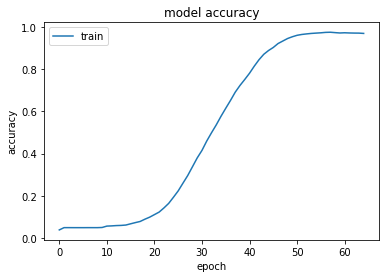

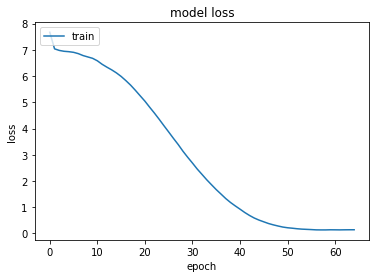

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()